# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Firman Hasibuan
- **Email:** firmanhasibuan14042004@gmail.com
- **ID Dicoding:**

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana waktu dalam sehari (jam) mempengaruhi konsentrasi PM2.5, dan apakah ada pola yang dapat digunakan untuk merencanakan tindakan pengendalian polusi?
- Pertanyaan 2: Apakah ada perbedaan yang signifikan dalam tingkat polusi antara bulan pertama dan kedua, dan bagaimana ini dapat mempengaruhi strategi pengelolaan polusi udara?
- Pertanyaan 3: Apakah ada outlier signifikan dalam data polutan yang perlu ditangani untuk analisis lebih lanjut?
- Pertanyaan 4: Apakah ada pola harian dalam konsentrasi polutan yang dapat membantu merencanakan pengendalian polusi?
- Pertanyaan 5: Bagaimana variasi jam mempengaruhi tingkat polusi, dan kapan waktu teraman untuk aktivitas luar ruangan?
- Pertanyaan 6: Apakah ada hubungan kuat antara berbagai polutan?
- Pertanyaan 7: Kota mana yang paling membutuhkan intervensi untuk mengurangi polusi udara, berdasarkan rata-rata konsentrasi PM2.5 dan PM10?
- Pertanyaan 8: Bagaimana nilai rata-rata Recency, Frequency, dan Monetary (RFM) dapat membantu dalam merancang strategi pengelolaan polusi yang lebih efektif?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Wrangling

### Gathering Data

In [2]:
# df1 = pd.read_csv('/content/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
# df2 = pd.read_csv('/content/PRSA_Data_Changping_20130301-20170228.csv')
# df3 = pd.read_csv('/content/PRSA_Data_Dingling_20130301-20170228.csv')
# df4 = pd.read_csv('/content/PRSA_Data_Dongsi_20130301-20170228.csv')
# df5 = pd.read_csv('/content/PRSA_Data_Guanyuan_20130301-20170228.csv')
# df6 = pd.read_csv('/content/PRSA_Data_Gucheng_20130301-20170228.csv')
# df7 = pd.read_csv('/content/PRSA_Data_Huairou_20130301-20170228.csv')
# df8 = pd.read_csv('/content/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
# df9 = pd.read_csv('/content/PRSA_Data_Shunyi_20130301-20170228.csv')
# df10 = pd.read_csv('/content/PRSA_Data_Tiantan_20130301-20170228.csv')
# df11 = pd.read_csv('/content/PRSA_Data_Wanliu_20130301-20170228.csv')
# df12 = pd.read_csv('/content/PRSA_Data_Wanshouxigong_20130301-20170228.csv')

In [3]:
# df1 = df1[df1['year'] == 2017]
# df2 = df2[df2['year'] == 2017]
# df3 = df3[df3['year'] == 2017]
# df4 = df4[df4['year'] == 2017]
# df5 = df5[df5['year'] == 2017]
# df6 = df6[df6['year'] == 2017]
# df7 = df7[df7['year'] == 2017]
# df8 = df8[df8['year'] == 2017]
# df9 = df9[df9['year'] == 2017]
# df10 = df10[df10['year'] == 2017]
# df11 = df11[df11['year'] == 2017]
# df12 = df12[df12['year'] == 2017]

In [4]:
# df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])
# df.to_csv('PRSA_ALL_DATA.csv', index=False)

In [5]:
df = pd.read_csv('/content/PRSA_ALL_DATA.csv')
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,33649,2017,1,1,0,485.0,496.0,8.0,121.0,6100.0,4.0,-4.7,1022.1,-6.1,0.0,ENE,1.0,Aotizhongxin
1,33650,2017,1,1,1,477.0,497.0,7.0,113.0,6300.0,4.0,-5.2,1022.3,-6.4,0.0,E,0.7,Aotizhongxin
2,33651,2017,1,1,2,454.0,469.0,7.0,111.0,6200.0,4.0,-5.4,1022.5,-6.5,0.0,ENE,1.1,Aotizhongxin
3,33652,2017,1,1,3,418.0,425.0,6.0,109.0,5900.0,3.0,-5.2,1022.5,-6.2,0.0,E,1.1,Aotizhongxin
4,33653,2017,1,1,4,438.0,468.0,10.0,123.0,7700.0,16.0,-5.0,1021.9,-5.8,0.0,ENE,1.0,Aotizhongxin


**Insight:**
- PM2.5:
Deskripsi: Konsentrasi partikel halus di udara dengan diameter kurang dari 2.5 mikrometer, diukur dalam mikrogram per meter kubik (µg/m³). PM2.5 adalah polutan berbahaya yang dapat menembus sistem pernapasan manusia, menyebabkan masalah kesehatan seperti asma dan penyakit paru-paru.

- PM10:
Deskripsi: Konsentrasi partikel di udara dengan diameter antara 2.5 hingga 10 mikrometer, diukur dalam µg/m³. PM10 dapat menyebabkan iritasi saluran pernapasan dan berkontribusi terhadap berbagai masalah kesehatan, terutama pada individu dengan kondisi pernapasan yang sudah ada.

- SO2:
Deskripsi: Konsentrasi dioksida sulfur, diukur dalam µg/m³. SO2 adalah gas yang dihasilkan dari pembakaran bahan bakar fosil, seperti batu bara dan minyak. Paparan SO2 dapat menyebabkan iritasi saluran pernapasan dan meningkatkan risiko penyakit pernapasan.

- NO2:
Deskripsi: Konsentrasi dinitrogen oksida, diukur dalam µg/m³. NO2 adalah polutan udara yang dihasilkan dari kendaraan bermotor dan industri. Paparan jangka pendek dapat menyebabkan iritasi pada saluran pernapasan, sementara paparan jangka panjang dapat memperburuk kondisi kesehatan seperti asma.

- CO:
Deskripsi: Konsentrasi karbon monoksida, diukur dalam µg/m³. CO adalah gas beracun yang dihasilkan dari pembakaran bahan bakar. Paparan tinggi dapat menyebabkan masalah kesehatan serius, termasuk keracunan.

- O3:
Deskripsi: Konsentrasi ozon permukaan, diukur dalam µg/m³. Ozon adalah gas yang dapat membahayakan kesehatan pernapasan, terutama pada hari-hari panas dan kering ketika polutan lainnya berkontribusi pada pembentukannya.

## Assessing Data

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16992 entries, 0 to 16991
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       16992 non-null  int64  
 1   year     16992 non-null  int64  
 2   month    16992 non-null  int64  
 3   day      16992 non-null  int64  
 4   hour     16992 non-null  int64  
 5   PM2.5    16728 non-null  float64
 6   PM10     16765 non-null  float64
 7   SO2      16747 non-null  float64
 8   NO2      16735 non-null  float64
 9   CO       16552 non-null  float64
 10  O3       16722 non-null  float64
 11  TEMP     16858 non-null  float64
 12  PRES     16864 non-null  float64
 13  DEWP     16858 non-null  float64
 14  RAIN     16863 non-null  float64
 15  wd       16559 non-null  object 
 16  WSPM     16912 non-null  float64
 17  station  16992 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 2.3+ MB
None


### value counts

In [7]:
objects = [col for col in df.columns if df[col].nunique() <= 12]
for col in objects:
    print(f"====={col}=====")
    unique_values = df[col].unique()
    n_unique_values = df[col].nunique()
    value_counts_values = df[col].value_counts()

    print(f"Unique values in {col}: {unique_values}")
    print(f"Number of unique values in {col}: {n_unique_values}\n")
    print(f"Number of unique values in {col}: {value_counts_values}\n")

=====year=====
Unique values in year: [2017]
Number of unique values in year: 1

Number of unique values in year: year
2017    16992
Name: count, dtype: int64

=====month=====
Unique values in month: [1 2]
Number of unique values in month: 2

Number of unique values in month: month
1    8928
2    8064
Name: count, dtype: int64

=====station=====
Unique values in station: ['Aotizhongxin' 'Changping' 'Dingling' 'Dongsi' 'Guanyuan' 'Gucheng'
 'Huairou' 'Nongzhanguan' 'Shunyi' 'Tiantan' 'Wanliu' 'Wanshouxigong']
Number of unique values in station: 12

Number of unique values in station: station
Aotizhongxin     1416
Changping        1416
Dingling         1416
Dongsi           1416
Guanyuan         1416
Gucheng          1416
Huairou          1416
Nongzhanguan     1416
Shunyi           1416
Tiantan          1416
Wanliu           1416
Wanshouxigong    1416
Name: count, dtype: int64



**Insight:**
DataFrame memiliki 16.992 entri dengan beberapa kolom yang mengalami missing values, seperti PM2.5 (264), PM10 (227), dan CO (440). Tipe data terdiri dari 11 kolom bertipe float, 5 kolom bertipe integer, dan 2 kolom bertipe object.Terdapat missing data dari column sehingga perlu melakukan pembersihan data. Proses ini penting untuk memastikan kualitas data sebelum melakukan analisis lebih lanjut.

### Cleaning Data

#### Check Missing Values

In [8]:
df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,264
PM10,227
SO2,245
NO2,257
CO,440


In [9]:
def hmv(df, method, columns):
  if method == 'mean':
    fill_val = df[columns].mean()
  elif method == 'median':
    fill_val = df[columns].median()
  elif method == 'modus':
    fill_val = df[columns].mode().iloc[0]

  df[columns] = df[columns].fillna(fill_val)
  return df

In [10]:
numeric_columns = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if df[col].isnull().any()]
categorical_columns = [col for col in df.select_dtypes(include=['object']).columns if df[col].isnull().any()]
df = hmv(df, 'median', numeric_columns)
df = hmv(df, 'modus', categorical_columns)

In [11]:
df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


## Duplicated Data

In [12]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
df.to_csv('PRSA_DATA_CLEAN.csv', index=False)

**Insight:**

Untuk menangani missing values, kita menggunakan metode imputation dengan median untuk kolom numerik dan modus untuk kolom kategorikal. Pemilihan median sebagai metode imputasi pada kolom numerik didasarkan pada kemampuannya untuk mengurangi pengaruh outlier, sehingga menghasilkan estimasi yang lebih stabil dan representatif. Sementara itu, modus dipilih untuk kolom kategorikal untuk mempertahankan nilai yang paling umum muncul, sehingga menjaga integritas data. Metode ini membantu memastikan bahwa data siap untuk analisis lebih lanjut tanpa kehilangan informasi yang signifikan.

## Exploratory Data Analysis (EDA)

In [14]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,16992.000000,16992.0,16992.000000,16992.000000,16992.00000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.00000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000
mean,34356.500000,2017.0,1.474576,15.288136,11.50000,91.950800,110.541137,18.048493,57.235993,1581.591337,39.88424,0.371299,1021.861045,-13.457910,0.002813,1.998193
std,408.775917,0.0,0.499368,8.577026,6.92239,111.940133,123.508696,19.169291,41.760694,1742.489568,31.20003,4.720951,6.261319,6.378983,0.039912,1.402871
min,33649.000000,2017.0,1.000000,1.000000,0.00000,2.000000,3.000000,1.000000,2.000000,100.000000,1.00000,-13.425000,997.100000,-31.700000,0.000000,0.000000
25%,34002.750000,2017.0,1.000000,8.000000,5.75000,12.000000,25.000000,5.000000,21.000000,400.000000,9.00000,-2.800000,1018.000000,-18.800000,0.000000,1.100000
50%,34356.500000,2017.0,1.000000,15.000000,11.50000,46.000000,68.000000,12.000000,51.000000,900.000000,38.00000,-0.225000,1022.000000,-13.000000,0.000000,1.600000
75%,34710.250000,2017.0,2.000000,23.000000,17.25000,131.000000,151.000000,24.000000,84.000000,2100.000000,64.00000,2.900000,1026.300000,-8.100000,0.000000,2.600000
max,35064.000000,2017.0,2.000000,31.000000,23.00000,835.000000,994.000000,300.000000,276.000000,10000.000000,500.00000,16.200000,1037.600000,0.900000,1.300000,12.000000


**Insight:**

Dari analisis statistik deskriptif, terdapat beberapa temuan penting dalam data polutan. Rata-rata konsentrasi PM2.5 adalah 91.95 µg/m³ dengan maksimum mencapai 835 µg/m³, menunjukkan adanya potensi pencemaran udara yang signifikan. Nilai standar deviasi yang tinggi (111.94) mengindikasikan variabilitas yang besar dalam data polutan, menunjukkan fluktuasi yang ekstrem dalam kualitas udara. Untuk polutan lainnya seperti SO2, NO2, dan CO, juga terdapat nilai maksimum yang cukup tinggi, sehingga menandakan perlunya perhatian lebih terhadap pencemaran udara di daerah tersebut. Data ini menunjukkan perlunya tindakan mitigasi untuk mengurangi pencemaran udara yang berpotensi membahayakan kesehatan masyarakat.

## Visualization & Explanatory Analysis

### Histogram Plot

#### Pertanyaan 1:
Bagaimana waktu dalam sehari (jam) mempengaruhi konsentrasi PM2.5, dan apakah ada pola yang dapat digunakan untuk merencanakan tindakan pengendalian polusi?

Lihat distribusi polusi PM2.5 berdasarkan waktu. Jika puncak polusi terjadi pada pagi atau sore hari, ini mungkin terkait dengan jam sibuk lalu lintas.

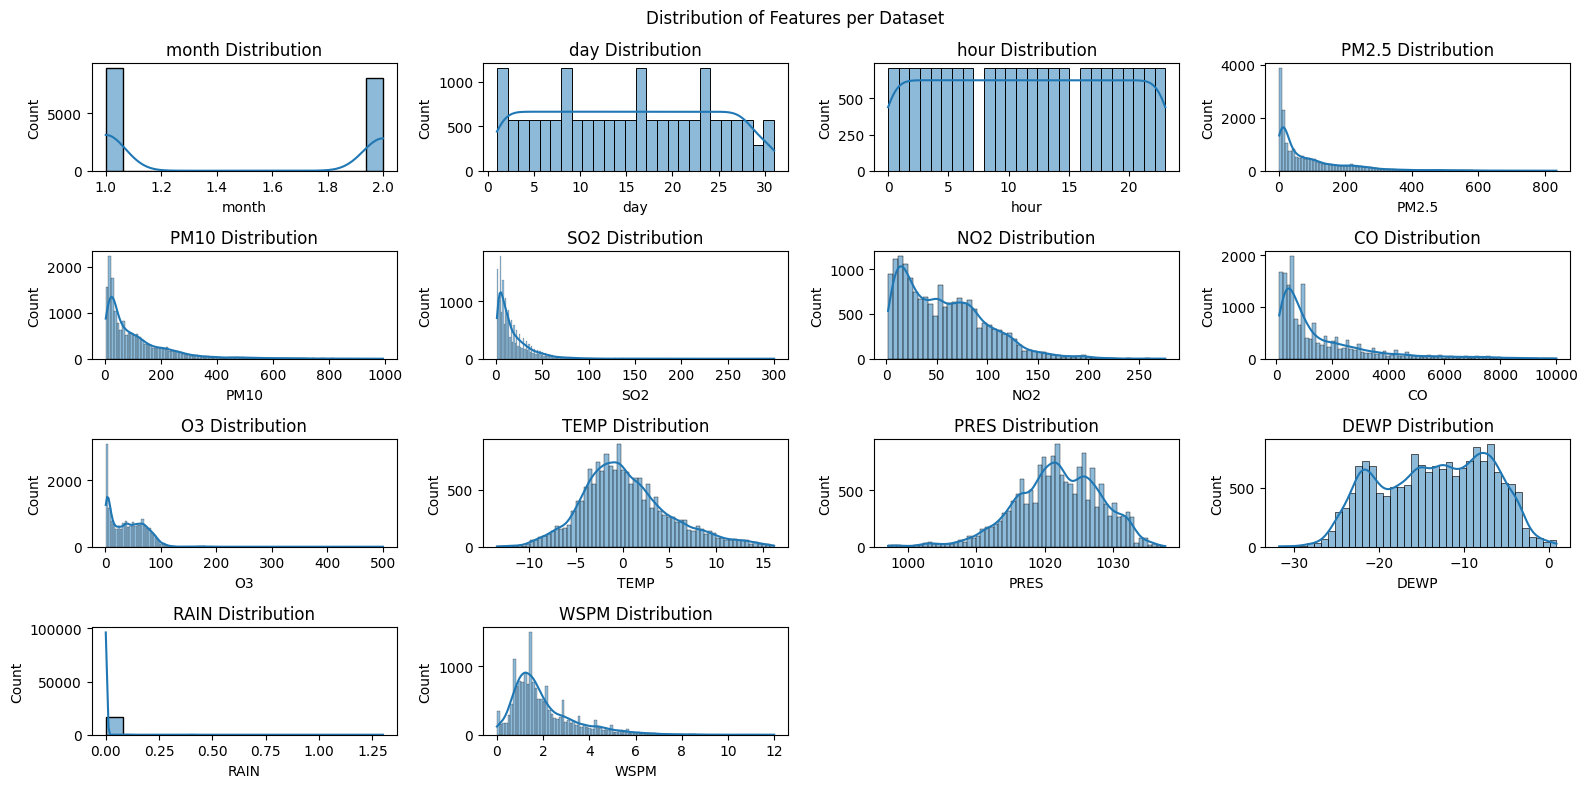

In [15]:
columns = [col for col in df.columns if df[col].dtype in ['float64', 'int64'] and col not in ['No', 'year']]
fig, axes = plt.subplots(4, 4, figsize=(16, 8))
axes = axes.flatten()
for i, col in enumerate(columns):
  ax = sns.histplot(data=df, x=col, ax=axes[i], kde=True)

  ax.set_title(f'{col} Distribution')
  ax.set_xlabel(f'{col}')

for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

fig.suptitle('Distribution of Features per Dataset')
plt.tight_layout()
plt.show()

### Categorical Plot (Pie and Bar Plot)

#### Pertanyaan 2:

Apakah ada perbedaan yang signifikan dalam tingkat polusi antara bulan pertama dan kedua, dan bagaimana ini dapat mempengaruhi strategi pengelolaan polusi udara?

Bandingkan konsentrasi polutan antara bulan pertama dan kedua. Jika bulan tertentu menunjukkan peningkatan polusi, teliti apakah ada faktor musiman atau kegiatan tertentu yang berkontribusi.

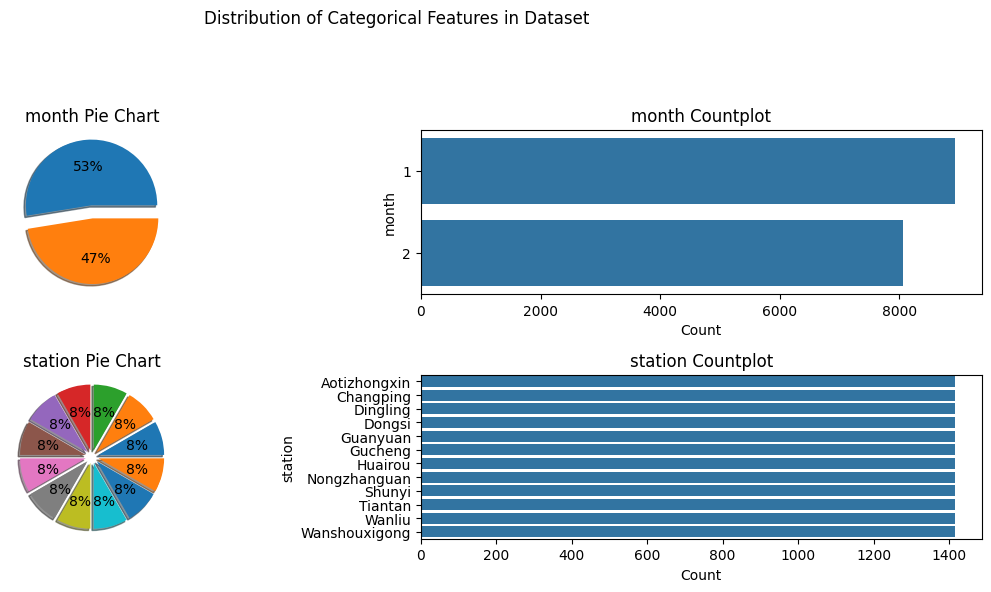

In [16]:
obj = [col for col in df.columns if df[col].nunique() <= 12 and col not in ['year']]

fig, axes = plt.subplots(len(obj), 2, figsize=(12, 3 * len(obj)))

for i, column in enumerate(obj):
  ax = axes[i, 0]
  ax.pie(
      df[column].value_counts(),
      shadow=True,
      explode=[0.1 for _ in range(df[column].nunique())],
      autopct='%1.f%%'
  )
  ax.set_aspect('equal')
  ax.set_title(f'{column} Pie Chart')

  ax1 = axes[i, 1]
  sns.countplot(y=column, ax=ax1, order=df[column].value_counts().index, data=df)
  ax1.set_xlabel('Count')
  ax1.set_ylabel(column)
  ax1.set_title(f'{column} Countplot')

fig.suptitle('Distribution of Categorical Features in Dataset\n\n\n')
plt.tight_layout()
plt.show()

### Boxplot

#### Pertanyaan 3:
Apakah ada outlier signifikan dalam data polutan yang perlu ditangani untuk analisis lebih lanjut?

Ya, terlihat bahwa polutan seperti PM2.5, PM10, SO2, dan CO memiliki banyak outlier. Ini menunjukkan adanya kejadian polusi ekstrem yang perlu dianalisis lebih dalam untuk memahami sumber dan dampaknya.


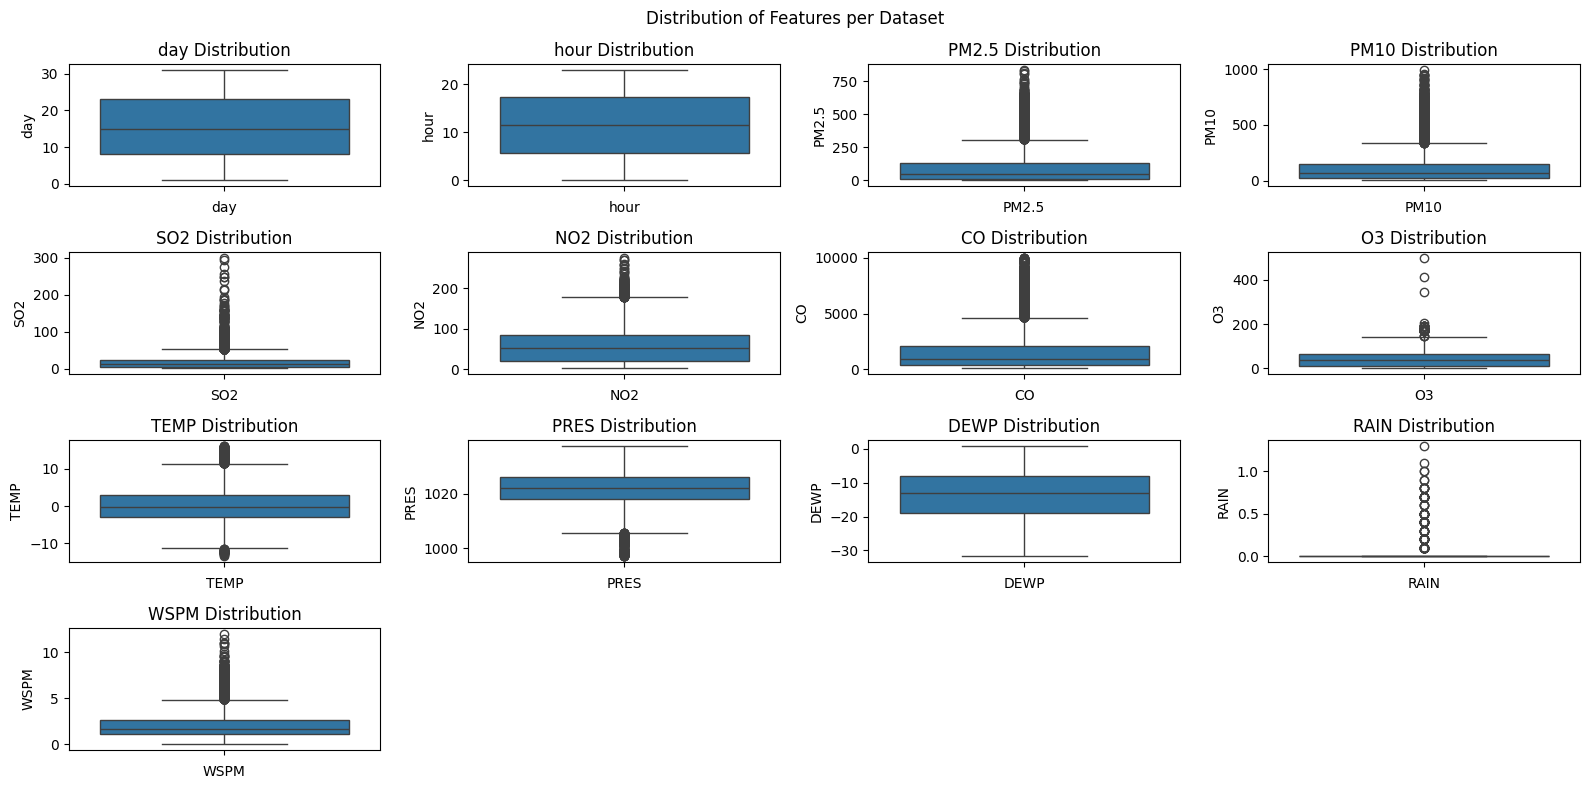

In [17]:
columns = [col for col in df.columns if df[col].dtype in ['float64', 'int64'] and col not in ['No', 'year', 'month']]
fig, axes = plt.subplots(4, 4, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(columns):
  ax = sns.boxplot(y=col, data=df, ax=axes[i])
  ax.set_title(f'{col} Distribution')
  ax.set_xlabel(f'{col}')

for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

fig.suptitle('Distribution of Features per Dataset')
plt.tight_layout()
plt.show()

### Line Plot

#### daily plot

##### Pertanyaan 4:
Apakah ada pola harian dalam konsentrasi polutan yang dapat membantu merencanakan pengendalian polusi?

Terdapat fluktuasi signifikan dalam konsentrasi harian, terutama pada PM2.5 dan PM10. Ini bisa digunakan untuk mengidentifikasi hari-hari dengan risiko polusi tinggi dan merencanakan tindakan mitigasi.

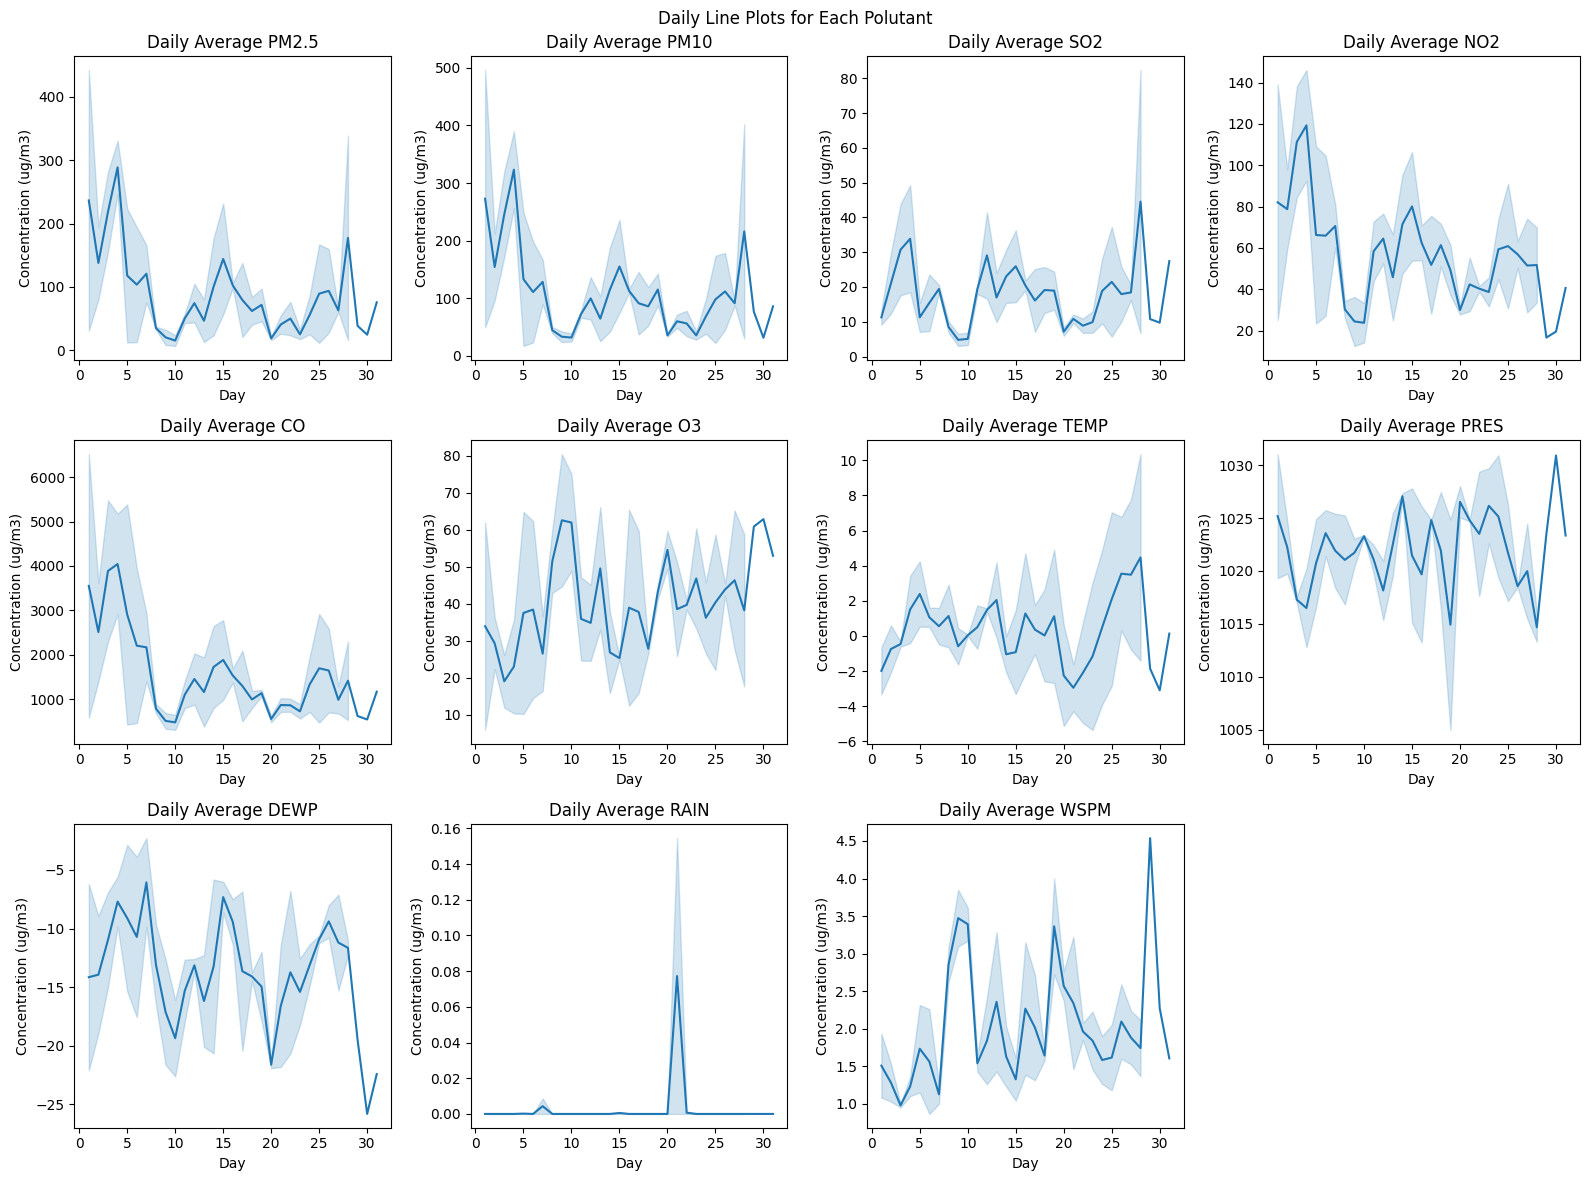

In [18]:
polutant_columns = [col for col in df.columns if df[col].dtype in ['float64', 'int64'] and col not in ['No', 'year', 'month', 'day', 'hour']]

fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for i, selected_polutant in enumerate(polutant_columns):
  daily_avg = df.groupby(['year', 'month', 'day'])[selected_polutant].mean().reset_index()
  ax = sns.lineplot(x='day', y=selected_polutant, data=daily_avg, ax=axes[i])
  ax.set_title(f'Daily Average {selected_polutant}')
  ax.set_xlabel('Day')
  ax.set_ylabel('Concentration (ug/m3)')

for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

fig.suptitle('Daily Line Plots for Each Polutant')
plt.tight_layout()
plt.show()

#### monthly plot

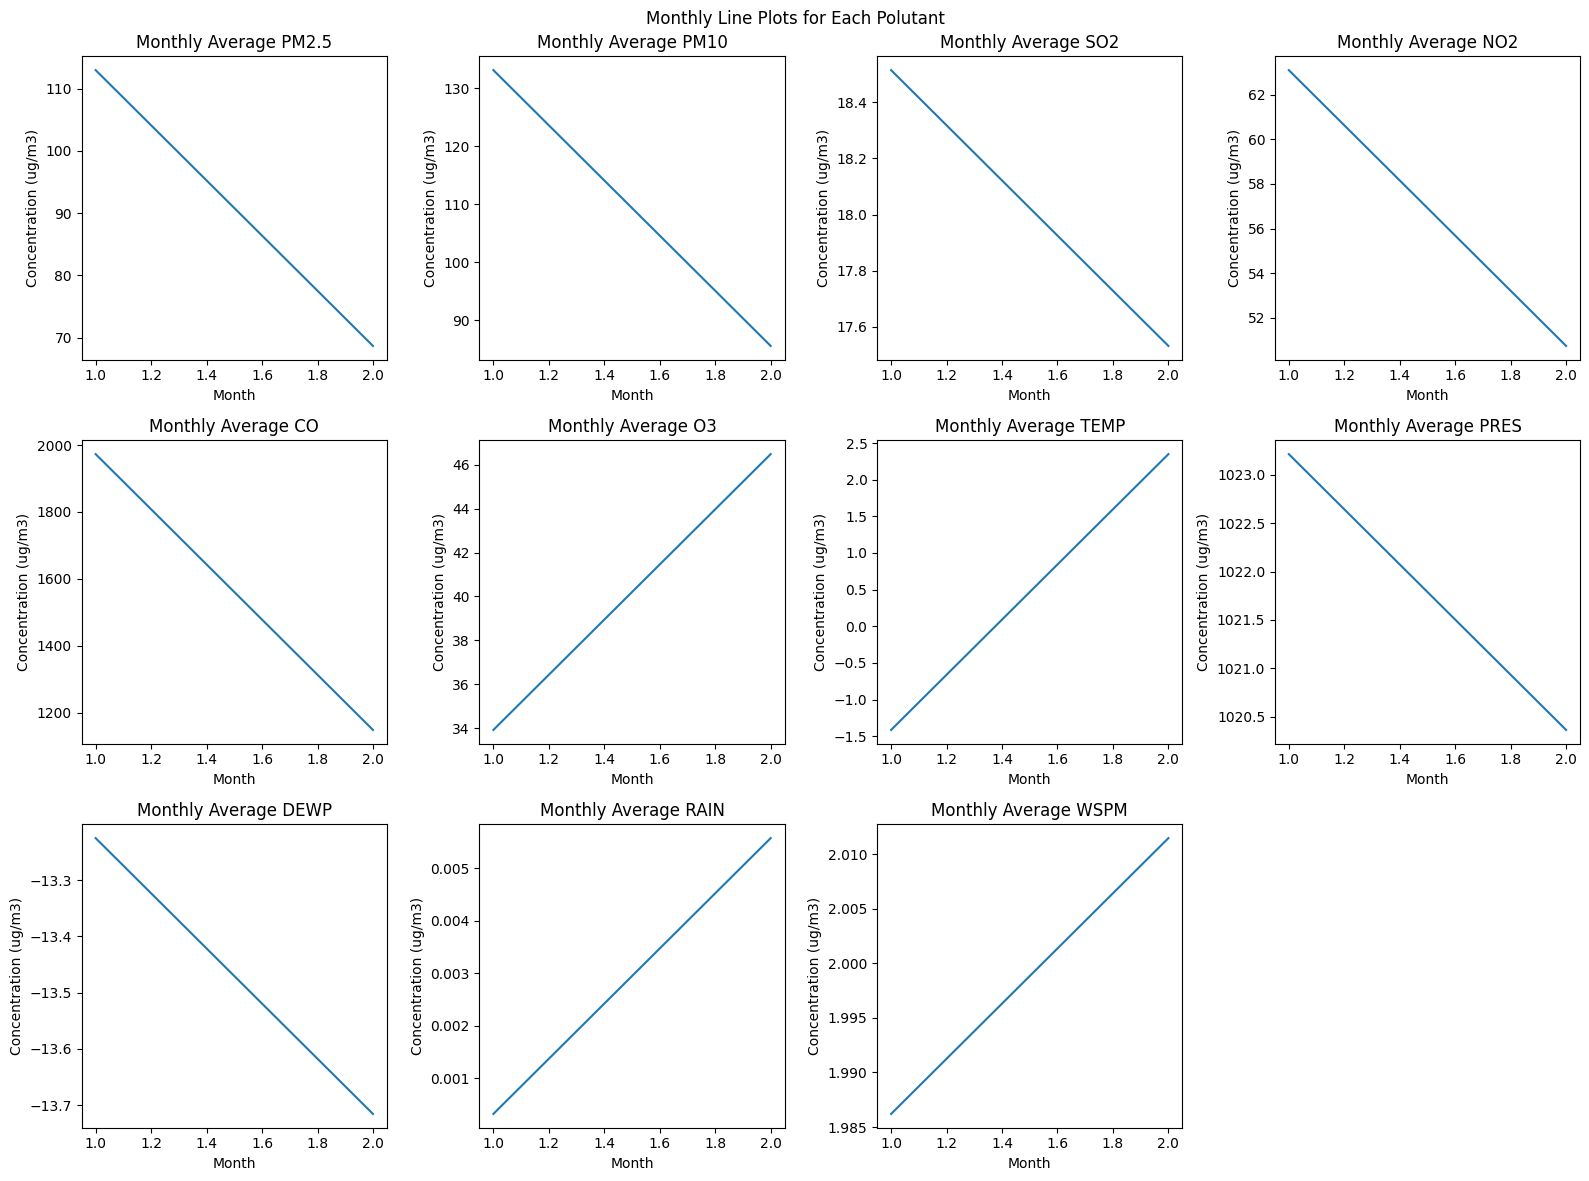

In [19]:
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for i, selected_polutant in enumerate(polutant_columns):
  monthly_avg = df.groupby(['year', 'month'])[selected_polutant].mean().reset_index()
  ax = sns.lineplot(x='month', y=selected_polutant, data=monthly_avg, ax=axes[i])
  ax.set_title(f'Monthly Average {selected_polutant}')
  ax.set_xlabel('Month')
  ax.set_ylabel('Concentration (ug/m3)')

for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

fig.suptitle('Monthly Line Plots for Each Polutant')
plt.tight_layout()
plt.show()

#### hourly plot

##### Pertanyaan 5:
Bagaimana variasi jam mempengaruhi tingkat polusi, dan kapan waktu teraman untuk aktivitas luar ruangan?

Konsentrasi polutan seperti PM2.5 dan CO cenderung lebih rendah pada pagi hari. Ini menunjukkan bahwa aktivitas luar ruangan mungkin lebih aman dilakukan pada waktu tersebut.

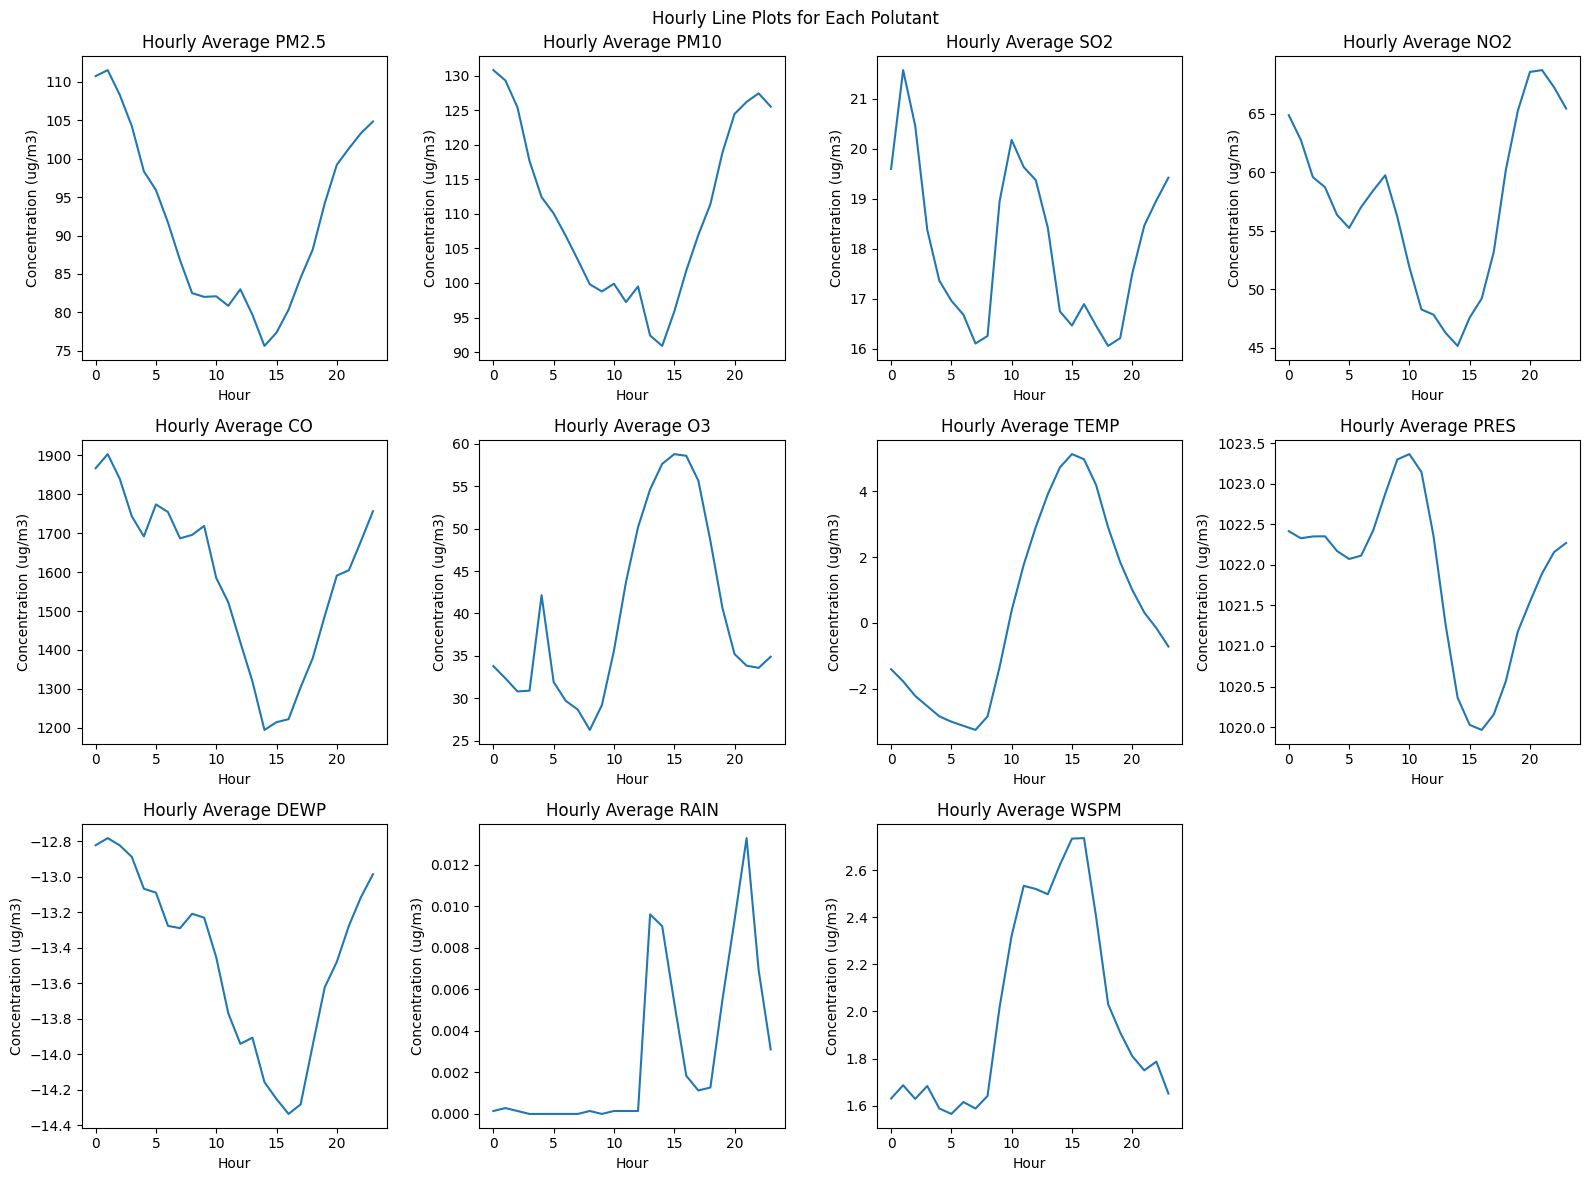

In [20]:
polutant_columns = [col for col in df.columns if df[col].dtype in ['float64', 'int64'] and col not in ['No', 'year', 'month', 'day', 'hour']]

fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for i, selected_polutant in enumerate(polutant_columns):
  hourly_avg = df.groupby('hour')[selected_polutant].mean().reset_index()
  ax = sns.lineplot(x='hour', y=selected_polutant, data=hourly_avg, ax=axes[i])
  ax.set_title(f'Hourly Average {selected_polutant}')
  ax.set_xlabel('Hour')
  ax.set_ylabel('Concentration (ug/m3)')

for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

fig.suptitle('Hourly Line Plots for Each Polutant')
plt.tight_layout()
plt.show()

### Scatter

#### Pertanyaan 6:
Apakah ada hubungan kuat antara berbagai polutan?

Terdapat korelasi yang kuat antara PM2.5 dan PM10, serta antara NO2 dan CO. Ini menunjukkan bahwa ketika konsentrasi PM2.5 naik, PM10 juga cenderung naik, dan hal serupa terjadi antara NO2 dan CO. Hubungan ini dapat membantu dalam memahami dinamika polutan di lingkungan.

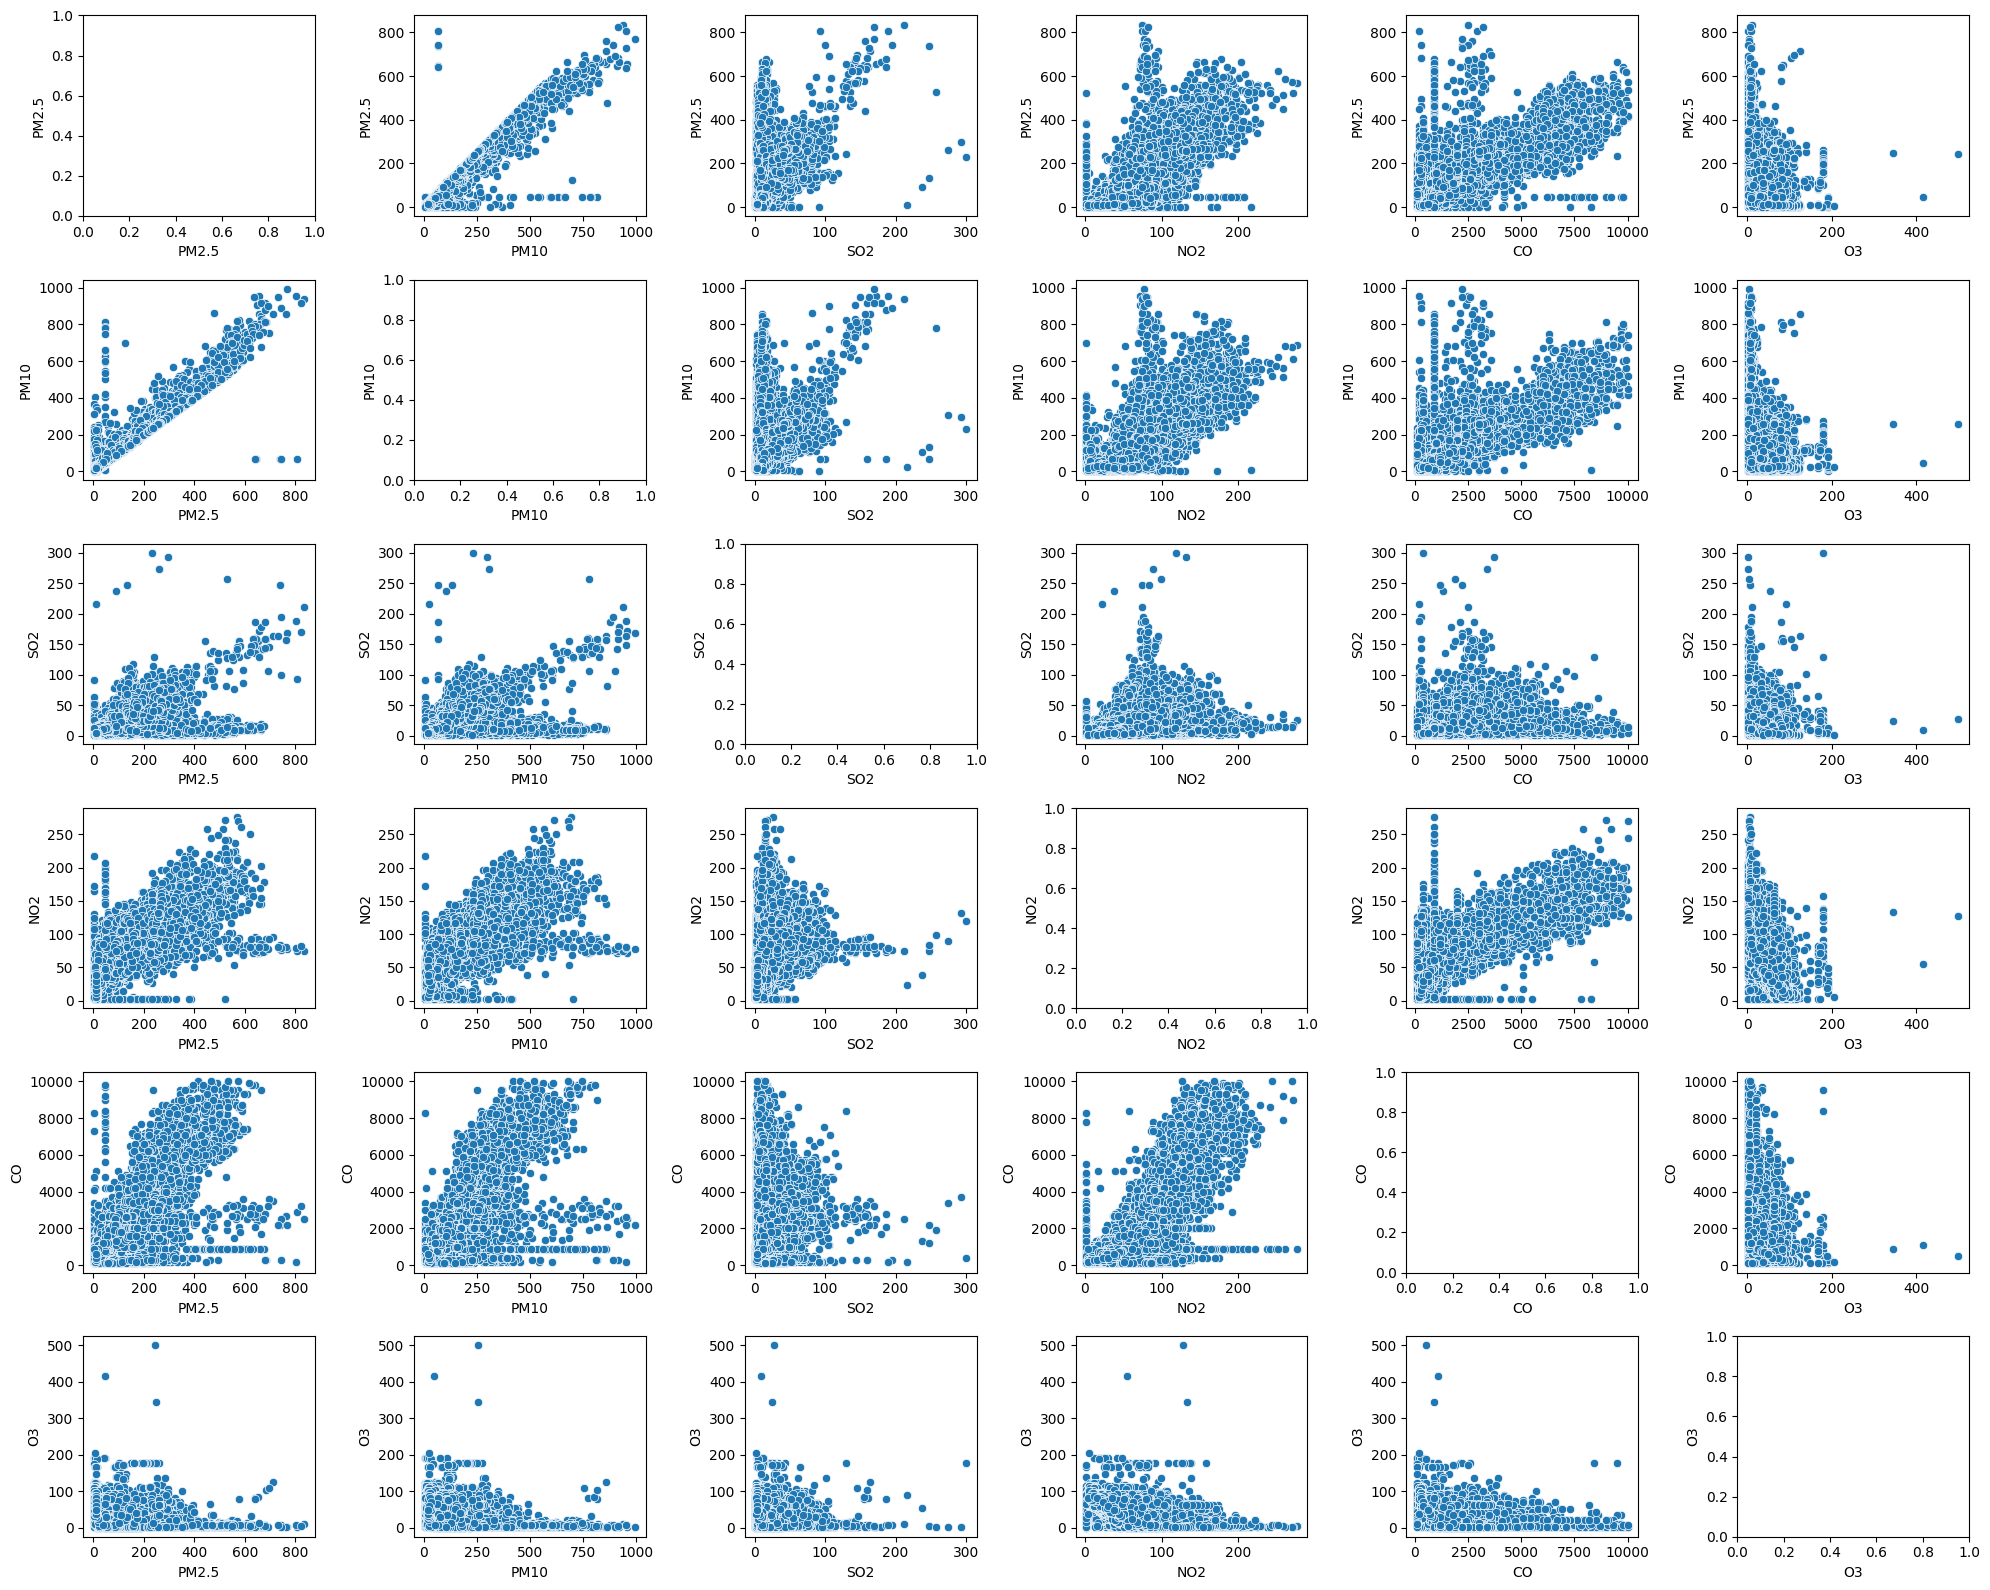

In [21]:
columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
num_vars = len(columns)

fig, axes = plt.subplots(num_vars, num_vars, figsize=(20, 16))

for i in range(num_vars):
  for j in range(num_vars):
    ax = axes[i, j]
    if i != j:
      sns.scatterplot(x=df[columns[j]], y=df[columns[i]], ax=ax)

    ax.set_xlabel(columns[j])
    ax.set_ylabel(columns[i])

plt.tight_layout()
plt.show()

### Barplot

####Pertanyaan 7:

Kota mana yang paling membutuhkan intervensi untuk mengurangi polusi udara, berdasarkan rata-rata konsentrasi PM2.5 dan PM10?

Berdasarkan data rata-rata, kota dengan konsentrasi PM2.5 dan PM10 tertinggi adalah Wanshouxigong dan Dongsi. Kedua kota ini menunjukkan tingkat polusi yang lebih tinggi dibandingkan kota lainnya.

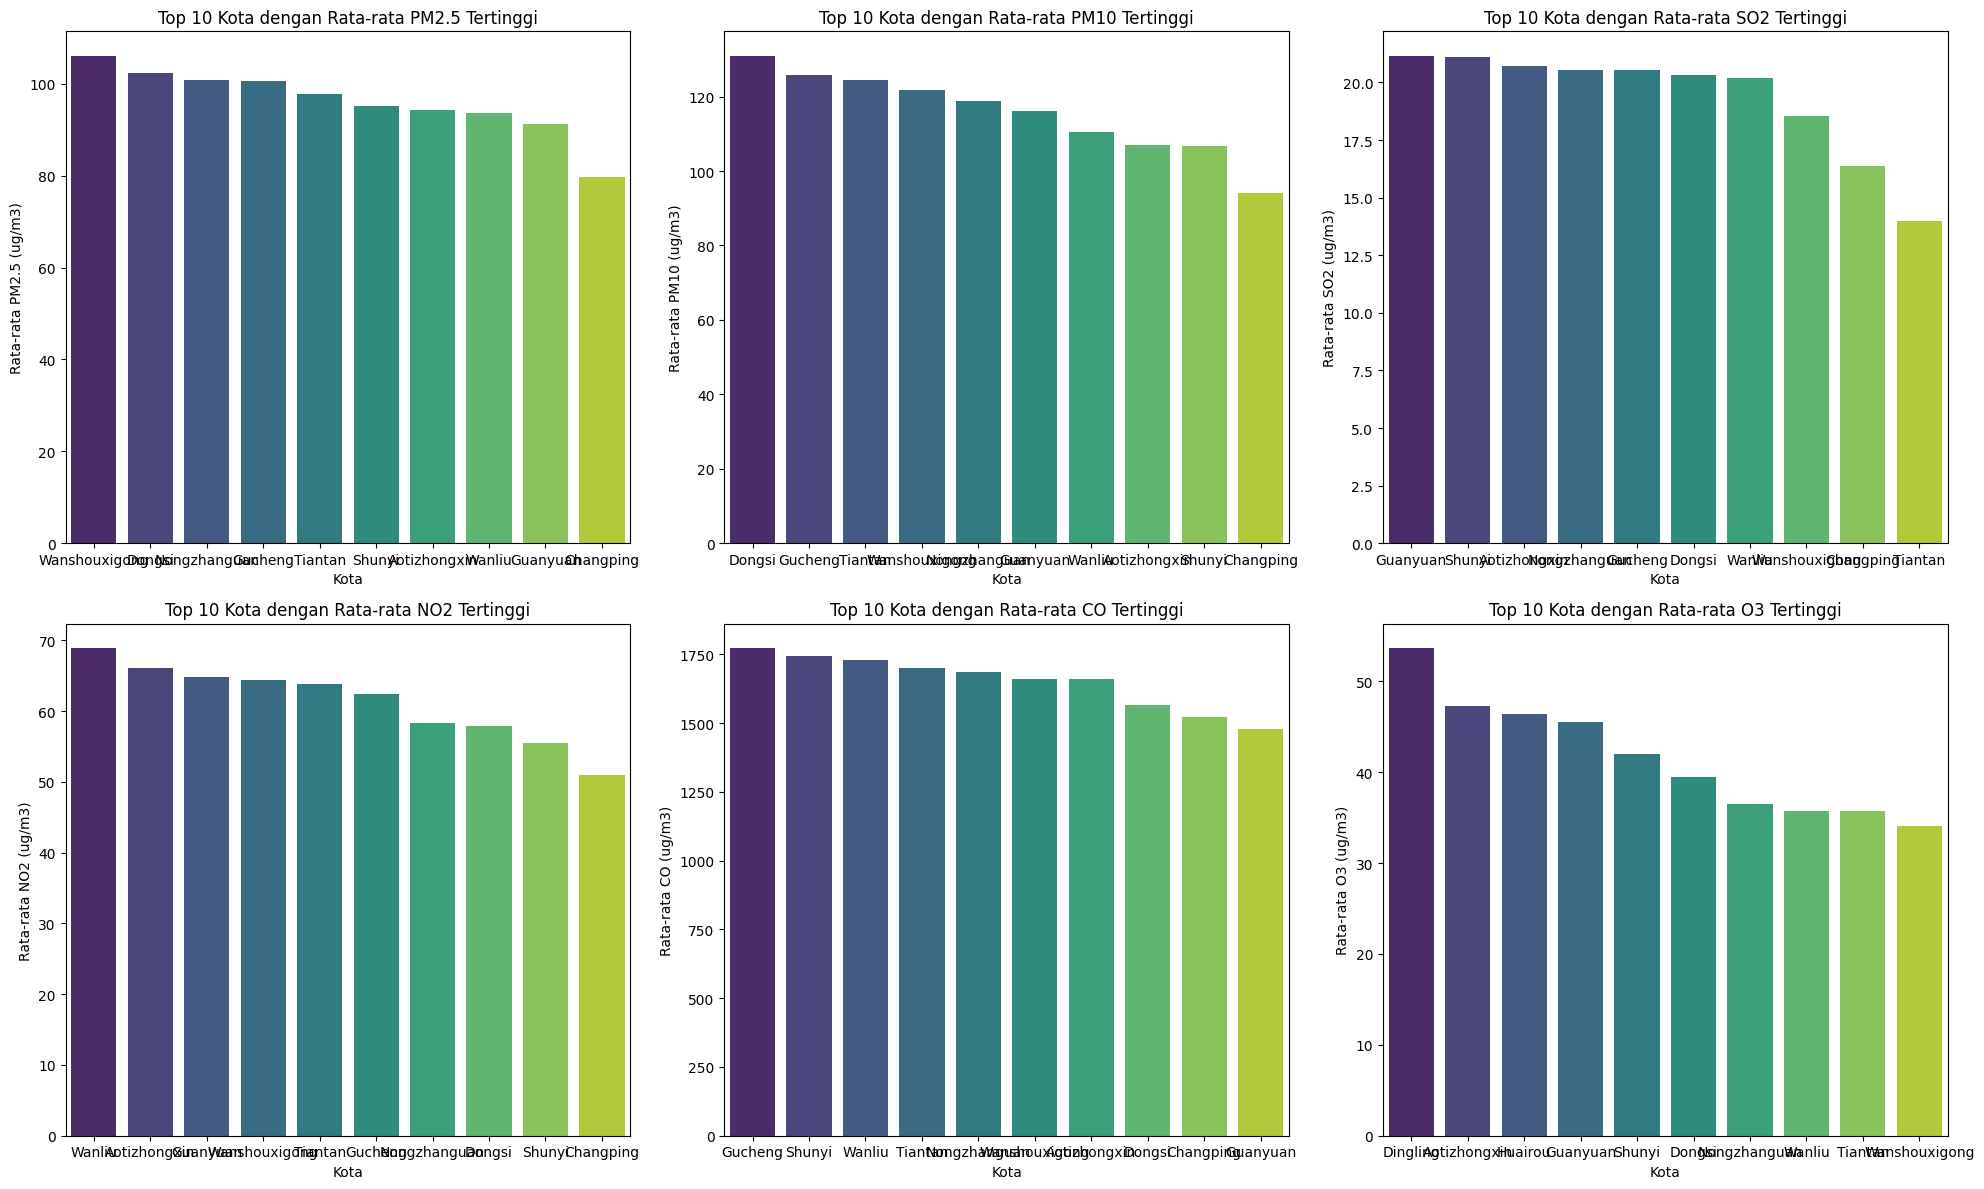

In [22]:
columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
num_vars = len(columns)

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, selected_pollutant in enumerate(columns):
  top_cities = df.groupby('station').agg({selected_pollutant: 'mean'}).reset_index()
  top_cities = top_cities.sort_values(by=selected_pollutant, ascending=False).head(10)

  ax = sns.barplot(x='station', y=selected_pollutant, data=top_cities, ax = axes[i], palette='viridis')
  ax.set_title(f'Top 10 Kota dengan Rata-rata {selected_pollutant} Tertinggi')
  ax.set_ylabel(f'Rata-rata {selected_pollutant} (ug/m3)')
  ax.set_xlabel('Kota')

plt.tight_layout()
plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

### Correlation Heatmap

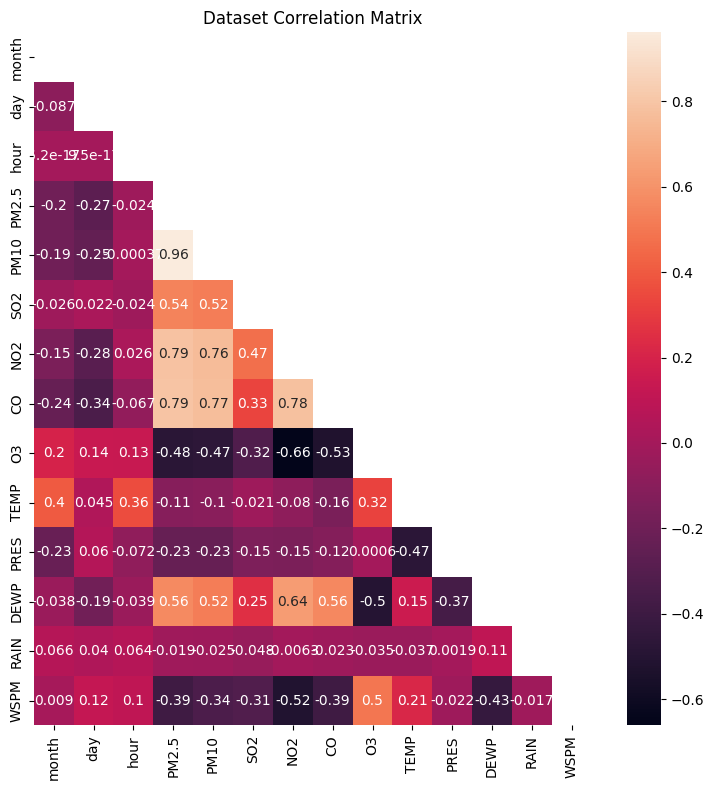

In [23]:
columns = [col for col in df.columns if col not in ['No', 'year'] and df[col].dtype in ['int64', 'float64']]

corr = df[columns].corr()
plt.figure(figsize=(9, 9))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True)
plt.title('Dataset Correlation Matrix')
plt.show()

### RFM

#### Pertanyaan 8:
Nilai rata-rata Recency, Frequency, dan Monetary yang diukur masing-masing pada 6.5 menunjukkan bahwa, secara umum, terdapat konsistensi dalam pola polusi yang diamati.

Recency yang tinggi mengindikasikan bahwa polusi terjadi baru-baru ini, menandakan perlunya tindakan segera untuk mengurangi emisi. Hal ini dapat mendorong pengambil keputusan untuk meningkatkan pengawasan dan respons terhadap sumber polusi.

Frequency yang sama menunjukkan bahwa kejadian polusi tidak hanya terjadi sesekali, tetapi merupakan masalah berulang yang memerlukan pendekatan berkelanjutan dalam pengelolaan. Ini berarti penting untuk merencanakan strategi mitigasi jangka panjang dan tidak hanya respons reaktif.

Monetary yang setara menunjukkan potensi dampak finansial dari polusi, baik dari segi biaya kesehatan masyarakat maupun kerugian ekonomi. Mengingat bahwa nilai ini berfungsi sebagai indikator dampak polusi, pengambil keputusan dapat lebih fokus pada pengalokasian sumber daya untuk intervensi yang paling efektif dalam jangka panjang.

In [24]:
rfm_data = df.groupby('station').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean',
}).reset_index()

rfm_data['R'] = rfm_data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].rank(method='min', ascending=False).mean(axis=1)
rfm_data['F'] = rfm_data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].rank(method='min', ascending=True).mean(axis=1)
rfm_data['M'] = rfm_data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].rank(method='min', ascending=True).mean(axis=1)

rfm_data['RFM Score'] = rfm_data[['R', 'F', 'M']].sum(axis=1)

avg_recency = round(rfm_data['R'].mean(), 1)
avg_frequency = round(rfm_data['F'].mean(), 2)
avg_monetary = round(rfm_data['M'].mean(), 2)

print(f"\nAverage Recency: {avg_recency}")
print(f"Average Frequency: {avg_frequency}")
print(f"Average Monetary: {avg_monetary}")


Average Recency: 6.5
Average Frequency: 6.5
Average Monetary: 6.5


## Conclusion

Analisis data polusi udara memberikan wawasan penting terkait pola dan tren yang dapat digunakan untuk merencanakan tindakan pengendalian polusi. Pertama, waktu dalam sehari (jam) menunjukkan pola tertentu dengan puncak konsentrasi PM2.5 pada pagi dan sore hari, yang kemungkinan terkait dengan jam sibuk lalu lintas. Hal ini menekankan perlunya strategi mitigasi yang lebih ketat selama periode tersebut.

Kedua, perbandingan tingkat polusi antara bulan pertama dan kedua menunjukkan adanya perbedaan signifikan, yang dapat dipengaruhi oleh faktor musiman dan aktivitas tertentu. Oleh karena itu, pengelolaan polusi udara harus mempertimbangkan fluktuasi musiman ini.

Ketiga, adanya banyak outlier dalam data polutan menunjukkan kejadian polusi ekstrem yang perlu dianalisis lebih lanjut untuk memahami sumber dan dampaknya. Fluktuasi harian dalam konsentrasi polutan, terutama PM2.5 dan PM10, mengindikasikan bahwa tindakan mitigasi dapat direncanakan berdasarkan pola harian.

Keempat, analisis menunjukkan bahwa konsentrasi polutan seperti PM2.5 dan CO cenderung lebih rendah pada pagi hari, menjadikan waktu tersebut lebih aman untuk aktivitas luar ruangan. Selain itu, hubungan yang kuat antara polutan seperti PM2.5 dan PM10 serta NO2 dan CO menunjukkan dinamika polutan yang saling terkait.

Analisis RFM (Recency, Frequency, Monetary) yang menunjukkan nilai rata-rata 6.5 di setiap kategori mengindikasikan bahwa polusi merupakan masalah berulang dengan dampak yang signifikan. Nilai Recency yang tinggi menunjukkan perlunya tindakan cepat untuk mengurangi emisi, sedangkan nilai Frequency menekankan pentingnya pendekatan berkelanjutan dalam pengelolaan polusi. Selain itu, nilai Monetary mencerminkan potensi dampak finansial dari polusi, yang dapat mendorong pengalokasian sumber daya untuk intervensi yang lebih efektif.

Akhirnya, kota-kota seperti Wanshouxigong dan Dongsi menonjol sebagai daerah yang paling membutuhkan intervensi untuk mengurangi polusi udara, mengingat rata-rata konsentrasi PM2.5 dan PM10 yang tinggi. Tindakan proaktif diperlukan untuk mengurangi dampak negatif polusi terhadap kesehatan masyarakat dan lingkungan. Dengan mengintegrasikan analisis RFM ke dalam strategi pengelolaan polusi, pengambil keputusan dapat merancang intervensi yang lebih tepat sasaran, meningkatkan efisiensi dalam penggunaan sumber daya, dan meminimalkan dampak polusi terhadap kualitas hidup masyarakat.